# Isotropic Diffusion via Heat Equation

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [3]:
I_color = img.imread('./barb-nq8.png')   # load color image
I_color.shape

(384, 480, 3)

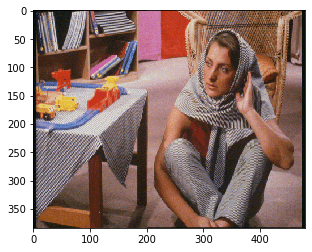

In [4]:
plt.imshow(I_color)

## check the size of image and convert 3D to 2D if necessary

In [5]:
n_dimension = I_color.shape[2]       # number of dimension of data
print(n_dimension)
type(n_dimension)

3


int

In [6]:
if n_dimension == 3:

    I           = I_color.mean(axis = 2) # convert 3-d data to 2-d data by taking average over the depth axis
    print(I.shape)

(384, 480)


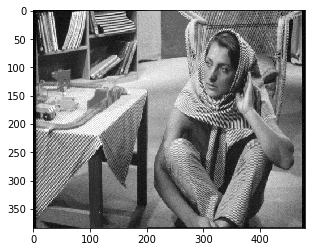

In [7]:
plt.imshow(I, cmap = 'gray')

In [8]:
n_dimension = I.ndim    # number of dimension of the convered data
print(n_dimension)

2


In [9]:
n_row       = I.shape[0]    # number of rows of data
n_column    = I.shape[1]    # number of columns of data


print("number of dimension = ", n_dimension)
print("number of rows = ", n_row)
print("number of columns = ", n_column)

number of dimension =  2
number of rows =  384
number of columns =  480


(-0.5, 479.5, 383.5, -0.5)

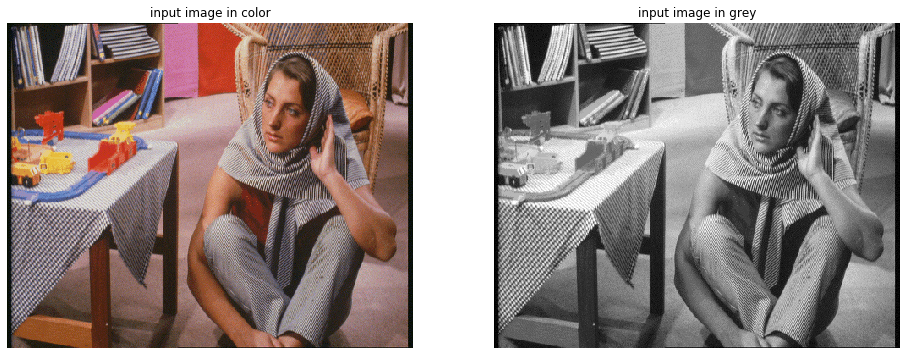

In [10]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(I_color)
plt.title('input image in color')
plt.axis('off')

plt.subplot(122)
plt.imshow(I, cmap = 'gray')
plt.title('input image in grey')
plt.axis('off')

```git commit -a -m "load image and check its size" ```

```git push origin master```

## normalize input image so that the range of image is $[0, 1]$

In [11]:
print(I.max())
print(I.min())

0.8627451
0.02745098


In [12]:
I = (I - I.min()) / (I.max() - I.min())

In [13]:
print(I)
print(I.max())
print(I.min())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02347418 0.02347418 0.        ]
 [0.         0.02347418 0.03599374 ... 0.03599374 0.06103287 0.        ]
 ...
 [0.         0.02347418 0.02347418 ... 0.02347418 0.03599374 0.03599374]
 [0.         0.02347418 0.02347418 ... 0.06103287 0.02347418 0.02347418]
 [0.         0.02347418 0.03599374 ... 0.         0.02347418 0.        ]]
1.0
0.0


```git commit -a -m "normalise data" ```

```git push origin master```

## define a function to compute the first-order derivatives with Neumann boundary condition

In [14]:
testArr = np.arange(1, 10).reshape(3, 3)
print(testArr)
a = np.pad(testArr, pad_width = 1, mode = 'edge',  )
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [7 7 8 9 9]
 [7 7 8 9 9]]


In [15]:
np.roll(a, shift = -1, axis = 0)

array([[1, 1, 2, 3, 3],
       [4, 4, 5, 6, 6],
       [7, 7, 8, 9, 9],
       [7, 7, 8, 9, 9],
       [1, 1, 2, 3, 3]])

In [16]:
np.arange(1, a.shape[1] - 1)

array([1, 2, 3])

In [17]:
k = np.arange(1, 76).reshape(5, 15)
print(k)
p = k[1:k.shape[0] - 1, np.arange(1, k.shape[1] - 1)]

print(p)

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
 [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
 [61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]]
[[17 18 19 20 21 22 23 24 25 26 27 28 29]
 [32 33 34 35 36 37 38 39 40 41 42 43 44]
 [47 48 49 50 51 52 53 54 55 56 57 58 59]]


In [18]:
print(I.shape)
k = np.pad(I, pad_width = 1, mode = 'edge', )
print(k)
k.shape

(384, 480)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02347418 0.         0.        ]
 ...
 [0.         0.         0.02347418 ... 0.02347418 0.02347418 0.02347418]
 [0.         0.         0.02347418 ... 0.02347418 0.         0.        ]
 [0.         0.         0.02347418 ... 0.02347418 0.         0.        ]]


(386, 482)

In [27]:
def compute_derivative_first_order(data, axis, scheme, boundary):

    if boundary == 'neumann':

        D = np.pad(I, pad_width = 1, mode = 'edge', )   # use numpy.pad function 

    if axis == 'x':

        if scheme == 'forward':

            derivative = np.roll(D, shift = -1, axis = 1) - D   # use numpy.roll function
        
        elif scheme == 'backward':

            derivative = D - np.roll(D, shift = 1, axis = 1)   # use numpy.roll function

        else:   # scheme == central

            derivative = (1/2) * (np.roll(D, shift = -1, axis = 1) - np.roll(D, shift = 1, axis = 1))    # use numpy.roll function
        
    elif axis == 'y':

        if scheme == 'forward':

            derivative = np.roll(D, shift = -1, axis = 0) - D   # use numpy.roll function

        elif scheme == 'backward':

            derivative = D - np.roll(D, shift = 1, axis = 0)   # use numpy.roll function

        else:   # scheme == central
            
            derivative = (1/2) * (np.roll(D, shift = -1, axis = 0) - np.roll(D, shift = 1, axis = 0))   # use numpy.roll function
        
    dRow = derivative.shape[0] # Row length of matrix 'derivative'
    dCol = derivative.shape[1] # Col length of matrix 'derivative'
    
    dD = derivative[1:dRow - 1, np.arange(1, dCol - 1)]   # remove the first and the last rows and columns for the boundary condition

    return(dD)

```git commit -a -m "define a function for computing the first-order derivative" ```

```git push origin master```

## define a function to compute the second-order derivatives with Neumann boundary condition

In [28]:
def compute_derivative_second_order(data, axis):
    if axis == 0 :
        # vertical (column wise), 즉 matrix에서 x가 증가하는 방향이므로 x에 대해서 differentiate
        D_forward   = compute_derivative_first_order(data, axis = 'x', scheme = 'forward', boundary = 'neumann')
        D_backward  = compute_derivative_first_order(data, axis = 'x', scheme = 'backward', boundary = 'neumann')

    elif axis == 1:
        # horizontal (row wise), 즉 matrix에서 y가 증가하는 방향이므로 y에 대해서 differentiate
        D_forward   = compute_derivative_first_order(data, axis = 'y', scheme = 'forward', boundary = 'neumann')
        D_backward  = compute_derivative_first_order(data, axis = 'y', scheme = 'backward', boundary = 'neumann')
    
    dDdD  = D_forward - D_backward   # use the above D_forward and D_backward

    return(dDdD)

```git commit -a -m "define a function for computing the second-order derivative" ```

```git push origin master```

## define a function to compute heat equation

In [29]:
def heat_equation(data, delta_t, number_iteration):

    u = data   # initialisation

    for t in range(number_iteration):

        laplace = compute_derivative_second_order(u, axis = 0) + compute_derivative_second_order(u, axis = 1)   # use the above defined functions
        u       = u + (delta_t * laplace)   # compute the heat equation u(t+1) = u(t) + delta_t * laplace(u) 

    return(u)

(-0.5, 479.5, 383.5, -0.5)

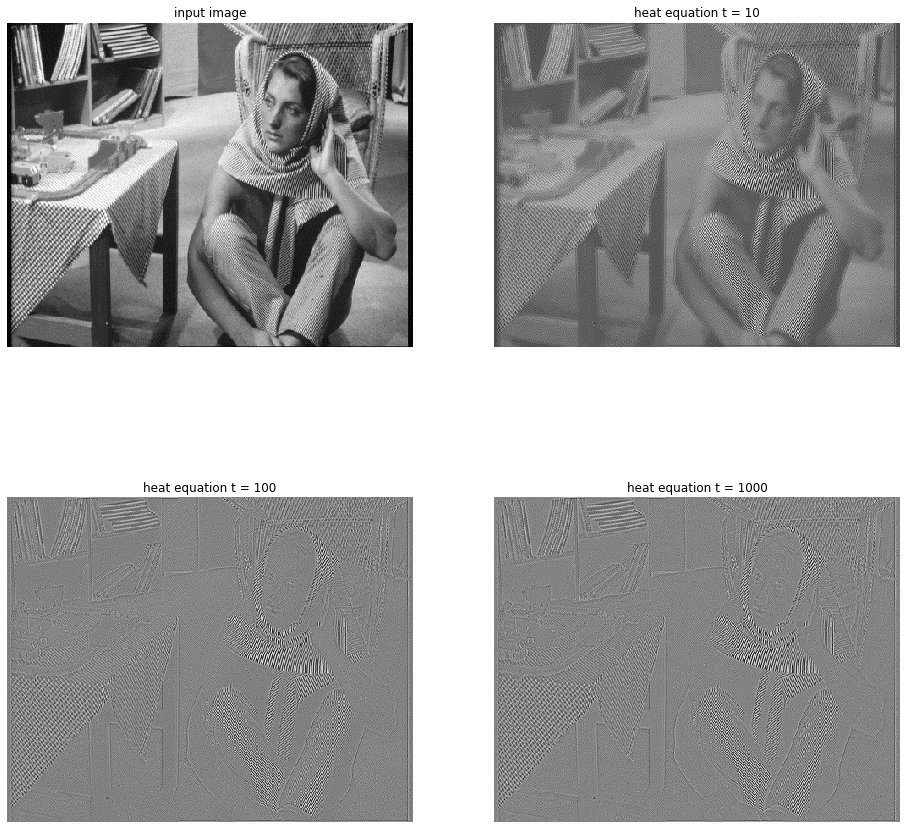

In [30]:
delta_t = 0.1   # delta t in the computation of heat equation

u10     = heat_equation(I, delta_t, 10)     # compute heat equation with 10 iterations

u100    = heat_equation(I, delta_t, 100)    # compute heat equation with 100 iterations

u1000   = heat_equation(I, delta_t, 1000)   # compute heat equation with 1000 iterations

plt.figure(figsize=(16,16))

# visualise the original image
plt.subplot(221)
plt.imshow(I, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

```git commit -a -m "compute the heat equation"```

```git push origin master```

## compute the (forward) first-order derivative of the solutions obtained by heat equation

In [31]:
Ix      = compute_derivative_first_order(I, 'x', 'forward', 'neumann')   # compute I_x using forward scheme
Iy      = compute_derivative_first_order(I, 'y', 'forward', 'neumann')   # compute I_y using forward scheme

u10_x   = compute_derivative_first_order(u10, axis = 'x', scheme = 'forward', boundary = 'neumann')   # compute u(10)_x using forward scheme
u10_y   = compute_derivative_first_order(u10, axis = 'y', scheme = 'forward', boundary = 'neumann')   # compute u(10)_y using forward scheme

u100_x  = compute_derivative_first_order(u100, axis = 'x', scheme = 'forward', boundary = 'neumann')   # compute u(100)_x using forward scheme
u100_y  = compute_derivative_first_order(u100, axis = 'y', scheme = 'forward', boundary = 'neumann')   # compute u(100)_y using forward scheme

u1000_x = compute_derivative_first_order(u1000, axis = 'x', scheme = 'forward', boundary = 'neumann')   # compute u(1000)_x using forward scheme
u1000_y = compute_derivative_first_order(u1000, axis = 'y', scheme = 'forward', boundary = 'neumann')   # compute u(1000)_y using forward scheme

(-0.5, 479.5, 383.5, -0.5)

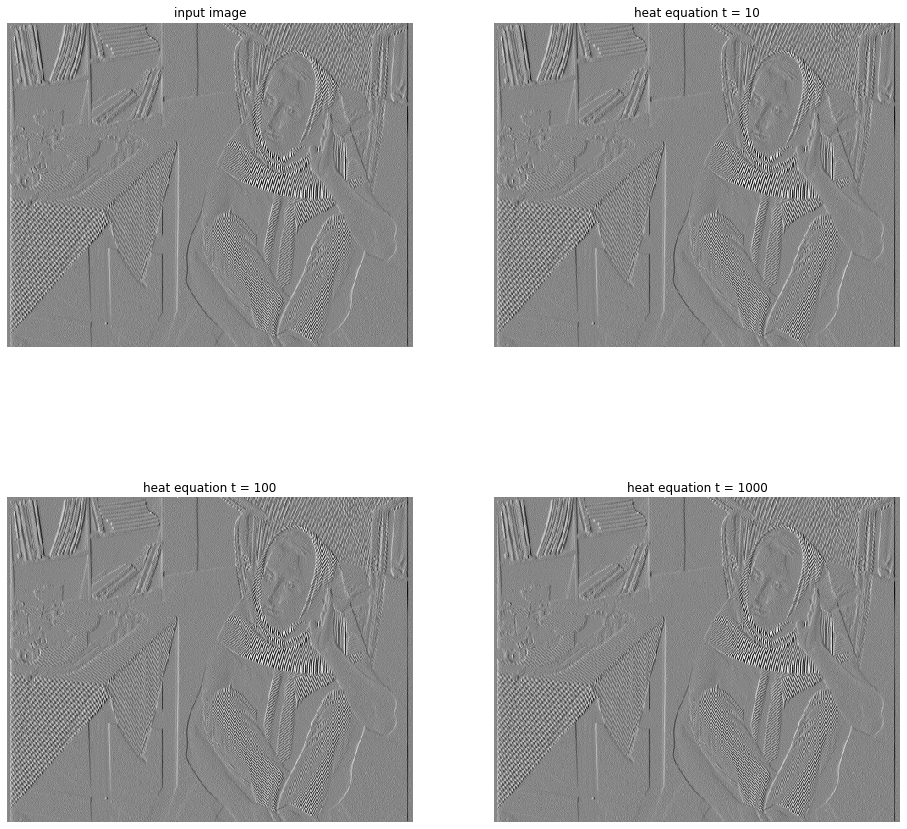

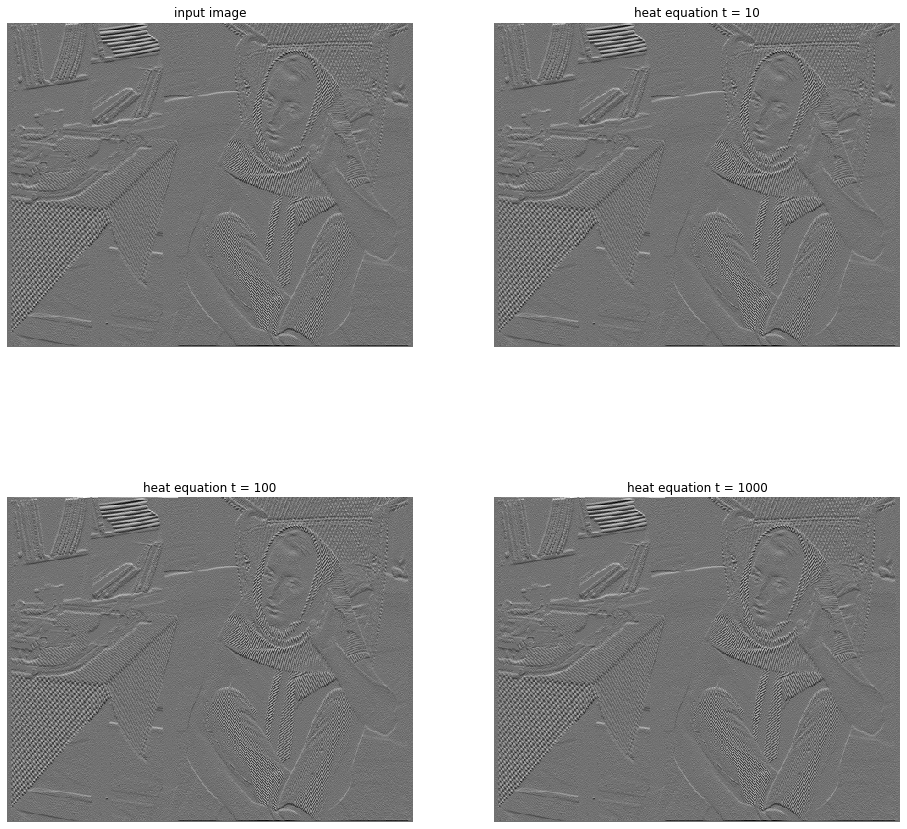

In [32]:
plt.figure(figsize=(16,16))

# visualise the first-order derivative in x-axis of the original image
plt.subplot(221)
plt.imshow(Ix, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the first-order derivative in x-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_x, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the first-order derivative in x-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_x, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the first-order derivative in x-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_x, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

plt.figure(figsize=(16,16))

# visualise the first-order derivative in y-axis of the original image
plt.subplot(221)
plt.imshow(Iy, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the first-order derivative in y-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_y, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the first-order derivative in y-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_y, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the first-order derivative in y-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_y, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

```git commit -a -m "compute the first-order derivative of the solution from the heat equations"```

```git push origin master```

## compute the second-order derivative of the solutions obtained by heat equation

In [25]:
Ixx         = compute_derivative_second_order(I, axis = 0)   # compute second derivative I_xx in x-direction
Iyy         = compute_derivative_second_order(I, axis = 1)   # compute second derivative I_yy in y-direction

u10_xx      = compute_derivative_second_order(u10, axis = 0)   # compute second derivative u(10)_xx in x-direction
u10_yy      = compute_derivative_second_order(u10, axis = 1)   # compute second derivative u(10)_yy in y-direction

u100_xx     = compute_derivative_second_order(u100, axis = 0)   # compute second derivative u(100)_xx in x-direction
u100_yy     = compute_derivative_second_order(u100, axis = 1)   # compute second derivative u(100)_yy in y-direction

u1000_xx    = compute_derivative_second_order(u1000, axis = 0)   # compute second derivative u(1000)_xx in x-direction
u1000_yy    = compute_derivative_second_order(u1000, axis = 1)   # compute second derivative u(1000)_yy in y-direction

(-0.5, 479.5, 383.5, -0.5)

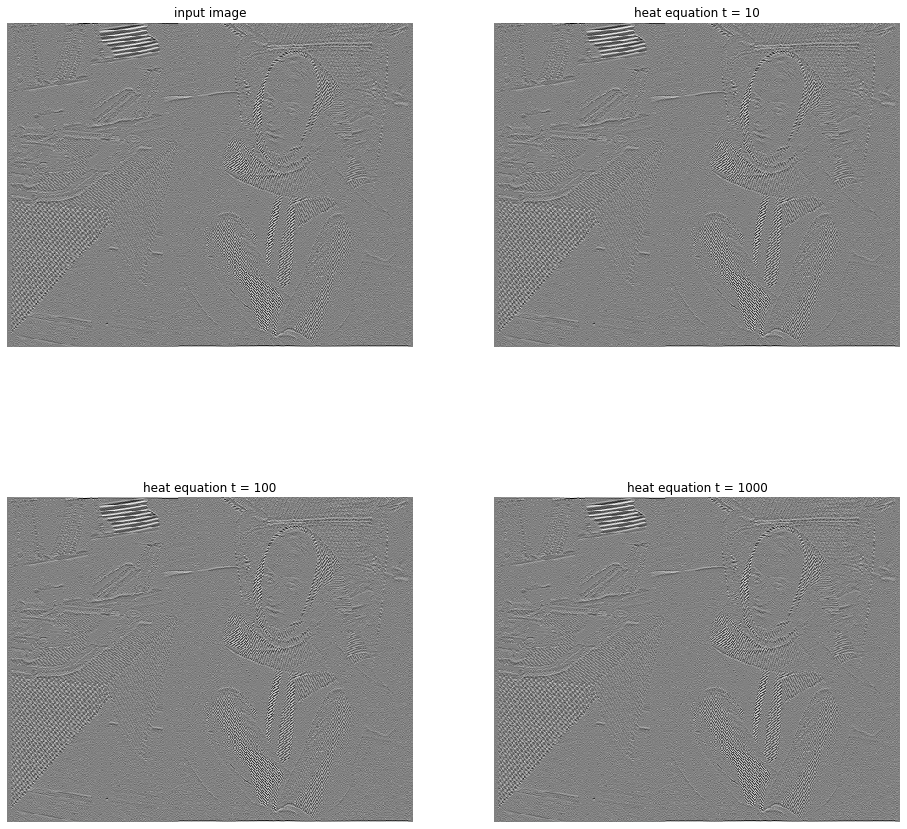

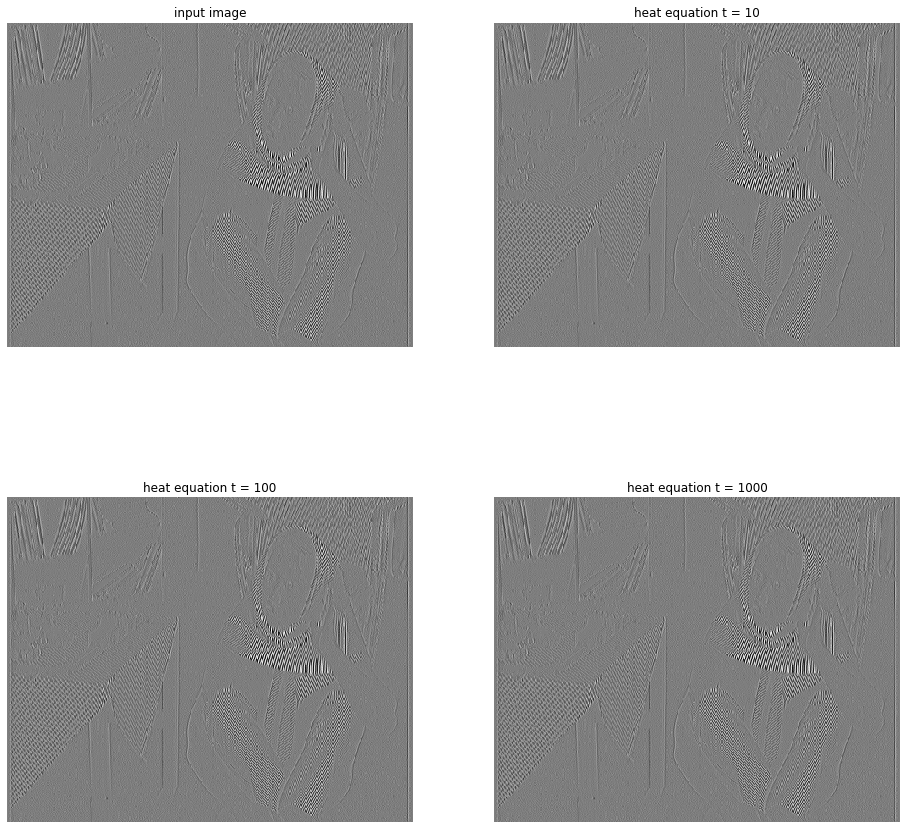

In [26]:
plt.figure(figsize=(16,16))

# visualise the second-order derivative in x-axis of the original image
plt.subplot(221)
plt.imshow(Ixx, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the second-order derivative in x-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_xx, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the second-order derivative in x-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_xx, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the second-order derivative in x-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_xx, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

plt.figure(figsize=(16,16))

# visualise the second-order derivative in y-axis of the original image
plt.subplot(221)
plt.imshow(Iyy, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the second-order derivative in y-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_yy, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the second-order derivative in y-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_yy, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the second-order derivative in y-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_yy, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')


```git commit -a -m "compute the second-order derivative of the solution from the heat equations"```

```git push origin master```

## define functions for the visualization

In [53]:
def plot_image_color(I, title = 'title'):
    
    plt.figure(figsize=(8,8))
    plt.imshow(I)
    plt.title(title)
    plt.axis('off')
        
def plot_image_gray(I, title = 'title'):
    
    plt.figure(figsize=(8,8))
    plt.imshow(I, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
def plot_image_gray_2x1(I1, I2, title1 = 'title 1', title2 = 'title 2'):
    
    plt.figure(figsize=(16,8))

    plt.subplot(121)
    plt.imshow(I1, cmap = 'gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(I2, cmap = 'gray')
    plt.title(title2)
    plt.axis('off')

def plot_image_gray_2x2(I1, I2, I3, I4, title1 = 'title 1', title2 = 'title 2', title3 = 'title 3', title4 = 'title 4'):
    
    plt.figure(figsize=(16,16))

    plt.subplot(221)
    plt.imshow(I1, cmap = 'gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(I2, cmap = 'gray')
    plt.title(title2)
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(I3, cmap = 'gray')
    plt.title(title3)
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(I4, cmap = 'gray')
    plt.title(title4)
    plt.axis('off')

```git commit -a -m "define functions for the visualization"```

```git push origin master```

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# # results

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

### # 01. plot the input image in color

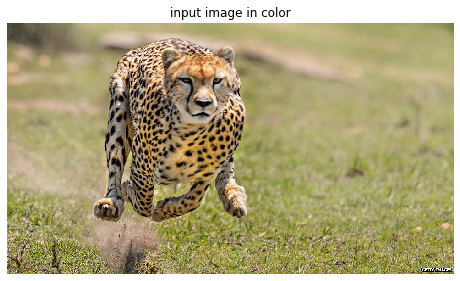

In [54]:
plot_image_color(I_color, 'input image in color')

### # 02. plot the input image in gray

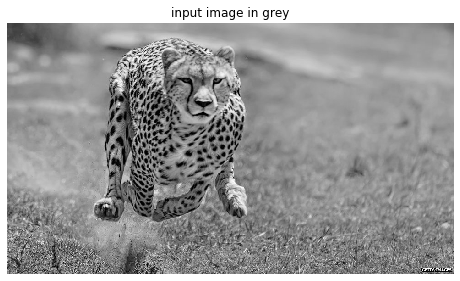

In [55]:
plot_image_gray(I, 'input image in grey')

### # 03. plot the (forward) first derivative $I_x$ and $I_y$ of input gray image $I$ with Neumann boundary condition

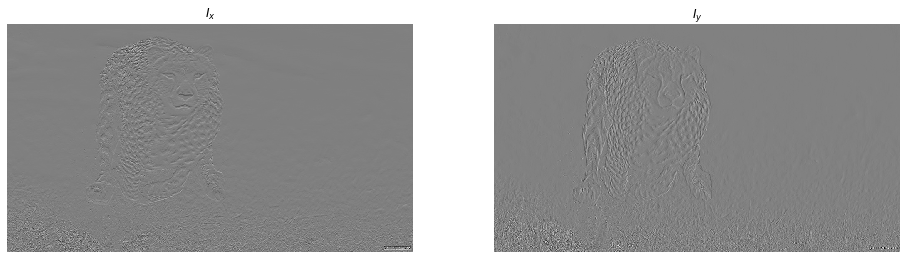

In [56]:
plot_image_gray_2x1(Ix, Iy, '$I_x$','$I_y$')

### # 04. plot the second derivative $I_{xx}$ and $I_{yy}$ of input gray image $I$ with Neumann boundary condition

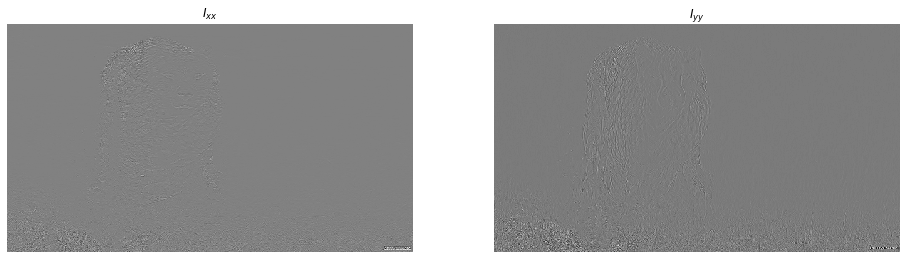

In [57]:
plot_image_gray_2x1(Ixx, Iyy, '$I_{xx}$', '$I_{yy}$')

### # 05. plot the original image and its solution of the heat equation with 10, 100, 1000 iterations

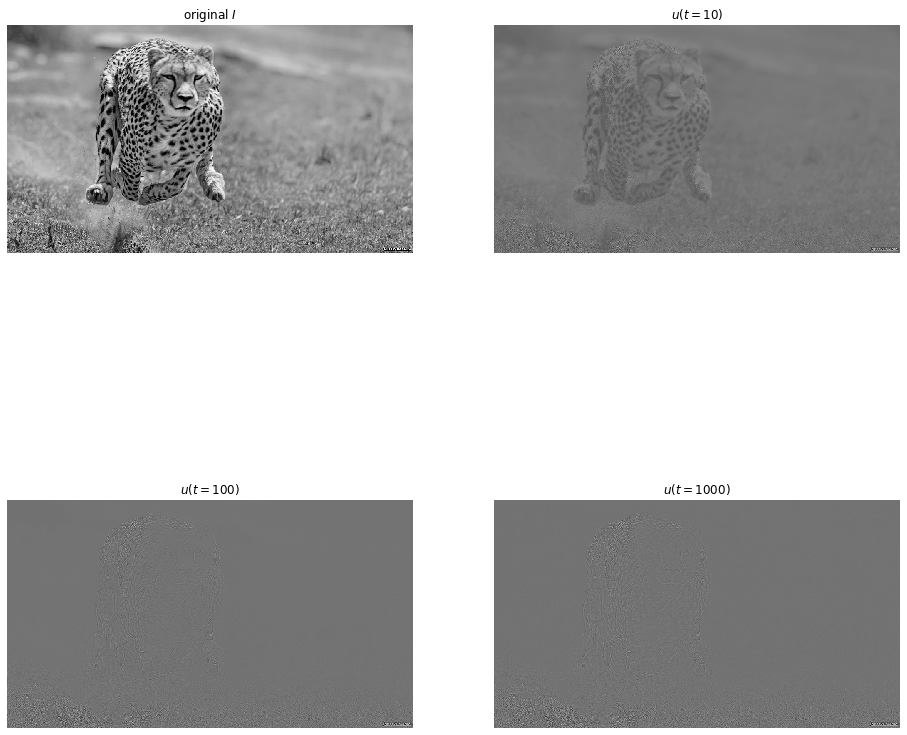

In [58]:
plot_image_gray_2x2(I, u10, u100, u1000, 'original $I$', '$u(t=10)$', '$u(t=100)$', '$u(t=1000)$')

### # 06. plot the (forward) first derivative of the solution of the heat equation with 10 iterations

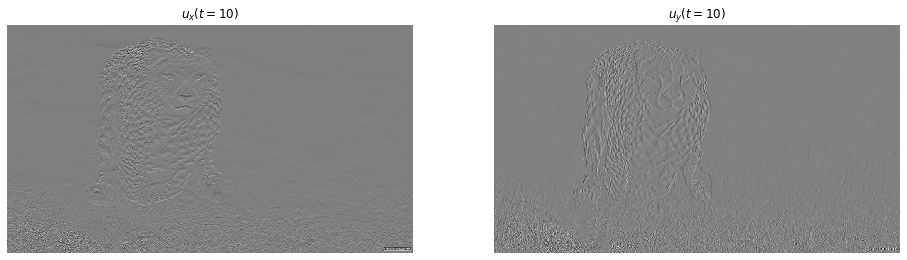

In [59]:
plot_image_gray_2x1(u10_x, u10_y, '$u_x(t=10)$', '$u_y(t=10)$')

### # 07. plot the (forward) first derivative of the solution of the heat equation with 100 iterations

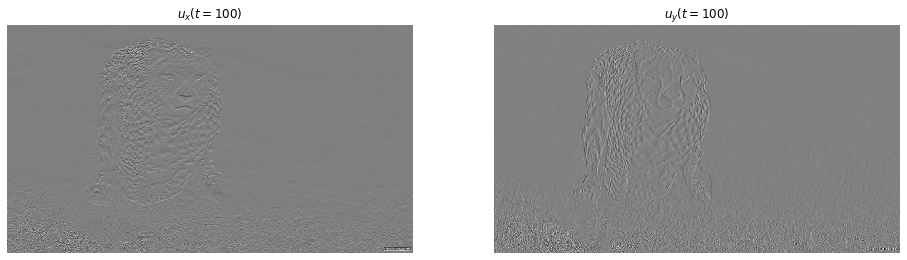

In [60]:
plot_image_gray_2x1(u100_x, u100_y, '$u_x(t=100)$', '$u_y(t=100)$')

### # 08. plot the (forward) first derivative of the solution of the heat equation with 1000 iterations

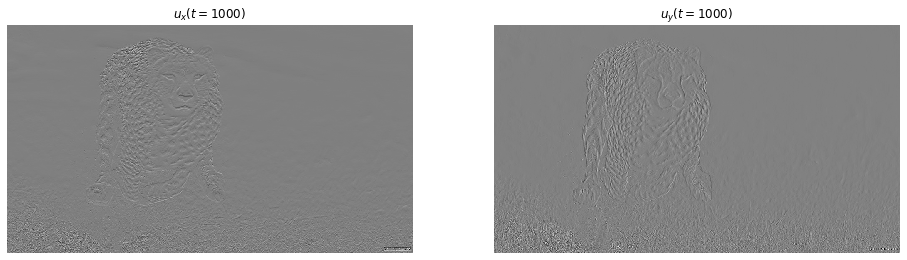

In [61]:
plot_image_gray_2x1(u1000_x, u1000_y, '$u_x(t=1000)$', '$u_y(t=1000)$')